In [1]:
%pylab inline
import pandas as pd
from mpl_toolkits.mplot3d import axes3d

Populating the interactive namespace from numpy and matplotlib


In [2]:
%matplotlib notebook

In [3]:
def readf(file):
    
    df = pd.read_fwf(file)
    arr = df.to_numpy()
    return arr


In [4]:
def isfloat(num):
    
    try:
        float(num)
        return True
    
    except ValueError:
        return False
    

In [5]:
def ks(arr,t):
    
    if len(t) == 0:
        sys.exit('Please input a keyword')
    else:
        pass
    
    num = len(arr[:,0])
    ta = []
    for i in range(len(t)):
        ta.append(t[i])
    ta = array(ta)
    ix = arr[:,0]
    nme = arr[:,1]
    ky = arr[:,2]
    sv = arr[:,3]
    
    if len(where(ta == ':')[0])==1:
        if t == ':':
            b = arange(0,num,1)
            
        else:
            c = where(ta == ':')[0][0]
            
            if len(t[0:c])>0:
                A = int(t[0:c])
            else:
                lidx = 0
            
            if len(t[c+1:])>0:
                B = int(t[c+1:])
            else:
                ridx = num 
                   
            if c ==0:
                if len(where(ix == B)[0])==1:
                    ridx = where(ix == B)[0][0]+1
                else:
                    sys.exit('list out of range')
                
            elif c == len(t)-1:
                if len(where(ix == A)[0])==1: 
                    lidx = where(ix == A)[0][0]
                else:
                    sys.exit('list out of range')
                
            else:
                if len(where(arr[:,0] == A)[0])==1 and len(where(arr[:,0] == B)[0])==1:
                    if A<B:
                        lidx = where(ix == A)[0][0]
                        ridx = where(ix == B)[0][0]+1
                    else:
                        sys.exit('the second index must be greater than the first one')
                else:
                    sys.exit('list out of range')
                    
                    
            b = arange(lidx,ridx,1)
                
    else:
        if t.isnumeric() == True:
            if len(where(arr[:,0] == int(t))[0])>0: 
                b  = where(arr[:,0] == int(t))[0]
            else:
                sys.exit('can not find the target element')
                    
        else:
            if len(t)>=2:
                
                if len(where(ta == '*')[0])==1:
                    tse = where(ta == '*')[0][0]
                    keyword = []
                    for i in range(len(nme)):
                            keyword.append(nme[i][0:tse])
                    keyword = array(keyword)
                    
                    if len(where(keyword == t[:-1])[0])>0:
                        b  = where(keyword == t[:-1])[0]
                        
                    else:
                        sys.exit('can not find the target element')
   
                elif 's ' in t and len(where(ta == ' ')[0])==2:
                    n1s = t.find('s ')+2
                    n1e = where(ta == ' ')[0][1]
                    n2s = where(ta == ' ')[0][1]+1
                    n1 = t[n1s:n1e] 
                    n2 = t[n2s:]
                    
                    if len(n1)>0 and len(n2)>0 and isfloat(n1) == True and isfloat(n2) == True:
                        
                        n1 = float(n1)
                        n2 = float(n2) 
                        
                        if n1>=0 and n2>0:
                            if n2 > n1:
                                if n2 <= max(sv)+5:
                                    if len(where(sv >= n1)[0])>0:
                                        A = where(sv >= n1)[0][0]
                                        if len(where(sv <= n2)[0])>0:
                                            B = where(sv <= n2)[0][-1]
                                            if A <= B: 
                                                b = arange(A,B+1,1)
                                            else:
                                                sys.exit('can not find any element in the given s range')
                                        else:
                                            sys.exit('upper boundry too small')
                                    else:
                                        sys.exit('lower boundry too big')
                                else:
                                    sys.exit('upper boundry too big (might exceed the circumference of the ring)')
                                    
                            else:
                                sys.exit('the second number must be greater than the first one')
                            
                        else:
                            sys.exit('s can not be a negative number')
                                
                    else:
                        sys.exit('requires two numbers to scale s')
                    
                    
                else:
                    if len(where(nme == t )[0])>0: 
                        b  = where(nme == t )[0]
                        
                    elif len(where(ky == t)[0])>0: 
                        b  = where(ky == t)[0]
            
                    else:
                        sys.exit('can not find the target element')
            else:
                sys.exit('Keyword too short')
                
    return b

In [6]:
def search_engine(arr,t):
    
    b = ks(arr,t)
    idx = arr[b,0]
    name = arr[b,1]
    key = arr[b,2]
    s  = arr[b,3]
    l = arr[b,4]
    x = arr[b,5]
    y = arr[b,6]
    z = arr[b,7]
    theta = arr[b,8]
    phi = arr[b,9]
    psi = arr[b,10]
    sx = arr[b,11]
    sy = arr[b,12]
    sz = arr[b,13]
    
    return idx, name, key, s, l, x, y, z, theta, phi, psi, sx, sy, sz

In [7]:
def sp(file,t):
    arr = readf(file)
    
    idx, name, key, s, l, x, y, z, theta, phi, psi, sx, sy, sz = search_engine(arr,t)
    
    figure(figsize=(10, 8))
     
    plot(s,sx,'b-',label = r'$S_x$')
    plot(s,sy,'g-',label = r'$S_y$')
    plot(s,sz,'r-',label = r'$S_z$')

    xlabel('s(m)',size = 20)
    ylabel('Spin Component',size = 20)
    title(r'Spin Motion of $e ^{-}$ (Co-Moving Frame) in the Rot Ring',size =20)
    legend(loc='best', fontsize = 15)
    show() 

In [8]:
def df(idx, name, key, s, l, x, y, z, theta, phi, psi, sx, sy, sz):
    pb=pd.DataFrame({'index':idx, 'name':name, 'key':key, 's (m)':s,\
                     'l (m)':l, 'floor.x':x,'floor.y':y,'floor.z':z,\
                     'floor.theta':theta,'floor.phi':phi,'floor.psi':psi,\
                     'spin.x':sx,'spin.y':sy,'spin.z':sz})
    #pd.set_option('display.max_rows', None)
    display(pb)

In [9]:
def ct(theta,sz,sx,sy): #coordinate transformation: from co-moving to lab frame
    Sz = -cos(theta)*sz+sin(theta)*sx
    Sx = -sin(theta)*sz-cos(theta)*sx
    Sy = sy
    return Sz, Sx, Sy

In [10]:
def score(inv, num, x, y, z, theta, phi, psi, sx, sy, sz, X, Y, Z, Theta, Phi, Psi, Sx, Sy, Sz):
    
    if len(inv)>0:
        gap = int(len(inv)/num)
        if len(inv)>=2*num:
            pass
        else:
            gap = gap+1
        
        X = append(X,x[inv][::gap])
        Y = append(Y,y[inv][::gap])
        Z = append(Z,z[inv][::gap])
        Theta = append(Theta,theta[inv][::gap])
        Phi = append(Phi,phi[inv][::gap])
        Psi = append(Psi,psi[inv][::gap])
        Sx = append(Sx,sx[inv][::gap])
        Sy = append(Sy,sy[inv][::gap])
        Sz = append(Sz,sz[inv][::gap])
    
    else:
        pass
        
    return X, Y, Z, Theta, Phi, Psi, Sx, Sy, Sz

In [11]:
def selector(idx, x, y, z, theta, phi, psi, sx, sy, sz, m, r, n):
    
    X = array([])
    Y = array([])
    Z = array([])
    Theta = array([])
    Phi = array([])
    Psi = array([])
    Sx = array([])
    Sy = array([])
    Sz = array([])
    
    
    a = where(logical_and(idx>=1452, idx<=1654))[0]
    
    b = where(logical_and(idx>=1655, idx<1847))[0]
    
    c = where(logical_and(idx>=1847, idx<=1865))[0]
    
    d = where(logical_and(idx>=1866, idx<2058))[0]
    
    e = where(logical_and(idx>=2058, idx<=5320))[0]
    
    f = where(logical_and(idx>=5321, idx<5513))[0]
    
    g = where(logical_and(idx>=5513, idx<=5517))[0]
    
    h = where(logical_and(idx>=5518, idx<5710))[0]
    
    i = where(logical_and(idx>=5710, idx<=5936))[0]
    
    
    X, Y, Z, Theta, Phi, Psi, Sx, Sy, Sz = score(a, n, \
                                                    x, y, z,theta, phi, psi, sx, sy, sz,\
                                                    X, Y, Z, Theta, Phi, Psi, Sx, Sy, Sz)
    
    X, Y, Z, Theta, Phi, Psi, Sx, Sy, Sz = score(b, r, \
                                                    x, y, z,theta, phi, psi, sx, sy, sz,\
                                                    X, Y, Z, Theta, Phi, Psi, Sx, Sy, Sz)
    
    X, Y, Z, Theta, Phi, Psi, Sx, Sy, Sz = score(c, 1, \
                                                    x, y, z,theta, phi, psi, sx, sy, sz,\
                                                    X, Y, Z, Theta, Phi, Psi, Sx, Sy, Sz)
    
    X, Y, Z, Theta, Phi, Psi, Sx, Sy, Sz = score(d, r, \
                                                    x, y, z,theta, phi, psi, sx, sy, sz,\
                                                    X, Y, Z, Theta, Phi, Psi, Sx, Sy, Sz)
    
    X, Y, Z, Theta, Phi, Psi, Sx, Sy, Sz = score(e, m, \
                                                    x, y, z,theta, phi, psi, sx, sy, sz,\
                                                    X, Y, Z, Theta, Phi, Psi, Sx, Sy, Sz)
    
    X, Y, Z, Theta, Phi, Psi, Sx, Sy, Sz = score(f, r, \
                                                    x, y, z,theta, phi, psi, sx, sy, sz,\
                                                    X, Y, Z, Theta, Phi, Psi, Sx, Sy, Sz)
    
    X, Y, Z, Theta, Phi, Psi, Sx, Sy, Sz = score(g, 1, \
                                                    x, y, z,theta, phi, psi, sx, sy, sz,\
                                                    X, Y, Z, Theta, Phi, Psi, Sx, Sy, Sz)
    
    X, Y, Z, Theta, Phi, Psi, Sx, Sy, Sz = score(h, r, \
                                                    x, y, z,theta, phi, psi, sx, sy, sz,\
                                                    X, Y, Z, Theta, Phi, Psi, Sx, Sy, Sz)
    
    X, Y, Z, Theta, Phi, Psi, Sx, Sy, Sz = score(i, n, \
                                                    x, y, z,theta, phi, psi, sx, sy, sz,\
                                                    X, Y, Z, Theta, Phi, Psi, Sx, Sy, Sz)
    
    return X, Y, Z, Theta, Phi, Psi, Sx, Sy, Sz

In [12]:
def DF(file,t):
    arr = readf(file)
    idx, name, key, s, l, x, y, z, theta, phi, psi, sx, sy, sz = search_engine(arr,t)
    df(idx, name, key, s, l, x, y, z, theta, phi, psi, sx, sy, sz)

In [13]:
def dc(x, y, z, theta, phi, psi, sx, sy, sz, lsc):
    
    x = x.astype(float)/lsc
    y = y.astype(float)
    z = z.astype(float)/lsc
    theta = theta.astype(float)
    phi = theta.astype(float)
    psi = theta.astype(float)
    sx = sx.astype(float)
    sy = sy.astype(float)
    sz = sz.astype(float)
    
    return  x, y, z, theta, phi, psi, sx, sy, sz

In [14]:
def tp(file, t, lsc, r, m, n):
    arr = readf(file)
    
    idx, name, key, s, l, x, y, z, theta, phi, psi, sx, sy, sz = search_engine(arr,':')
    
    x, y, z, theta, phi, psi, sx, sy, sz = dc(x, y, z, theta, phi, psi, sx, sy, sz, lsc)
    
    
    idxi, namei, keyi, si, li, xi, yi, zi, thetai, phii, psii, sxi, syi, szi = search_engine(arr,'INJECTIO')
    
    xi, yi, zi, thetai, phii, psii, sxi, syi, szi = dc(xi, yi, zi, thetai, phii, psii, sxi, syi, szi, lsc)
        
    xx = x
    yy = y
    zz = z
    
    x0 = x[0]
    y0 = y[0]
    z0 = z[0]
    
    Rx = x[1855]
    Ry = y[1855]
    Rz = z[1855]
    
    Lx = x[5321]
    Ly = y[5321]
    Lz = z[5321]

    Sz0, Sx0, Sy0 = ct(theta[0], sz[0], sx[0], sy[0])
    
    
    
    idx, name, key, s, l, x, y, z, theta, phi, psi, sx, sy, sz = search_engine(arr,t)
    
    x, y, z, theta, phi, psi, sx, sy, sz = dc(x, y, z, theta, phi, psi, sx, sy, sz, lsc)
    X, Y, Z, Theta, Phi, Psi, Sx, Sy, Sz = selector(idx, x, y, z, theta, phi, psi, sx, sy, sz, r, m, n)

    Sz, Sx, Sy = ct(Theta, Sz, Sx, Sy)
    
    fig = figure(figsize=(13,11))
    ax = fig.add_subplot(111, projection='3d')
    
    ax.set_xlim([min(zz), max(zz)])
    ax.set_ylim([min(xx),max(xx)])
    ax.set_zlim([-1, 2])
        
    ax.quiver(z0, x0, y0, Sz0, Sx0, Sy0, color ='red',alpha = 1)

    ax.plot(zz, xx, yy, color='gold', linewidth = 2) 

    
    ax.scatter(z0, x0, y0, c= 'darkorange', marker='o',s=50)
    ax.text(0, 0, -0.5, "IP", color='red', size = 20)
    
    ax.scatter(zi, xi, yi, c= 'darkorange', marker='o',s=50)
    ax.text(zi[0], xi[0], zi[0]-1, "Injection", color='darkorange', size = 20)
    
    ax.quiver(Z, X, Y, Sz, Sx, Sy, color ='olive',alpha = 0.6)
    ax.quiver(z0, x0, y0, Sz0, Sx0, Sy0, color ='red',alpha = 1)
    
    ax.text(Rz, Rx, Ry-0.5, "R-Rot", color='darkorange', size = 20)
    ax.text(Lz, Lx, Ly-0.5, "L-Rot", color='darkorange', size = 20)
        
    ax.set_title(r'Spin Motion of $e ^-$ (Lab Frame) in the SuperKEKB HER with Spin Rotator Installed', size =17) 
    ax.set_xlabel(r'Z ($\times %s m$)'%lsc,fontsize=15)
    ax.set_ylabel(r'X ($\times %s m$)'%lsc,fontsize=15)
    ax.set_zlabel(r'Y',fontsize=15)
    
    show()
    

In [15]:
data = pd.read_fwf('Rot-spin-floor(-).txt')

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7415 entries, 0 to 7414
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Index        7415 non-null   int64  
 1   name         7415 non-null   object 
 2   key          7415 non-null   object 
 3   s            7415 non-null   float64
 4   l            7415 non-null   object 
 5   floor.x      7415 non-null   float64
 6   floor.y      7415 non-null   float64
 7   floor.z      7415 non-null   float64
 8   floor.theta  7415 non-null   float64
 9   floor.phi    7415 non-null   float64
 10  floor.psi    7415 non-null   float64
 11  spin.x       7415 non-null   float64
 12  spin.y       7415 non-null   float64
 13  spin.z       7415 non-null   float64
dtypes: float64(10), int64(1), object(3)
memory usage: 811.1+ KB


In [17]:
DF('Rot-spin-floor(-).txt', 'RFcavity')

,index,name,key,s (m),l (m),floor.x,floor.y,floor.z,floor.theta,floor.phi,floor.psi,spin.x,spin.y,spin.z
0,2656,CAHOLE,RFcavity,692.681,0.000,-412.19,-1.4757e-12,-433.93,-4.6624,6.7e-15,3.1482e-15,-7.52139e-05,1,-5.05508e-05
1,2659,CAGOLE,RFcavity,695.774,0.000,-415.28,-1.4964e-12,-433.78,-4.6624,6.7e-15,3.1482e-15,-7.52139e-05,1,-5.05508e-05
2,2670,CAFOLE,RFcavity,702.107,0.000,-421.6,-1.5388e-12,-433.46,-4.6624,6.7e-15,3.1482e-15,-7.52139e-05,1,-5.05712e-05
3,2673,CAEOLE,RFcavity,705.2,0.000,-424.69,-1.5596e-12,-433.31,-4.6624,6.7e-15,3.1482e-15,-7.52139e-05,1,-5.05712e-05
4,2684,CADOLE,RFcavity,711.532,0.000,-431.02,-1.602e-12,-432.99,-4.6624,6.7e-15,3.1482e-15,-7.52139e-05,1,-5.06512e-05
5,2687,CACOLE,RFcavity,714.625,0.000,-434.1,-1.6227e-12,-432.84,-4.6624,6.7e-15,3.1482e-15,-7.52139e-05,1,-5.06512e-05
6,2698,CABOLE,RFcavity,720.958,0.000,-440.43,-1.6651e-12,-432.52,-4.6624,6.7e-15,3.1482e-15,-7.52139e-05,1,-5.06001e-05
7,2701,CAAOLE,RFcavity,724.051,0.000,-443.52,-1.6859e-12,-432.37,-4.6624,6.7e-15,3.1482e-15,-7.52139e-05,1,-5.06001e-05
8,4601,CADNLE,RFcavity,2202.11,0.000,-491.2,-1.0827e-11,477.04,-1.5208,-2.8525e-15,-8.3126e-15,-5.64359e-05,1,-7.10468e-05
9,4612,CACNLE,RFcavity,2211.54,0.000,-481.79,-1.08e-11,476.57,-1.5208,-2.8525e-15,-8.3126e-15,-5.64359e-05,1,-7.10331e-05


<IPython.core.display.Javascript object>


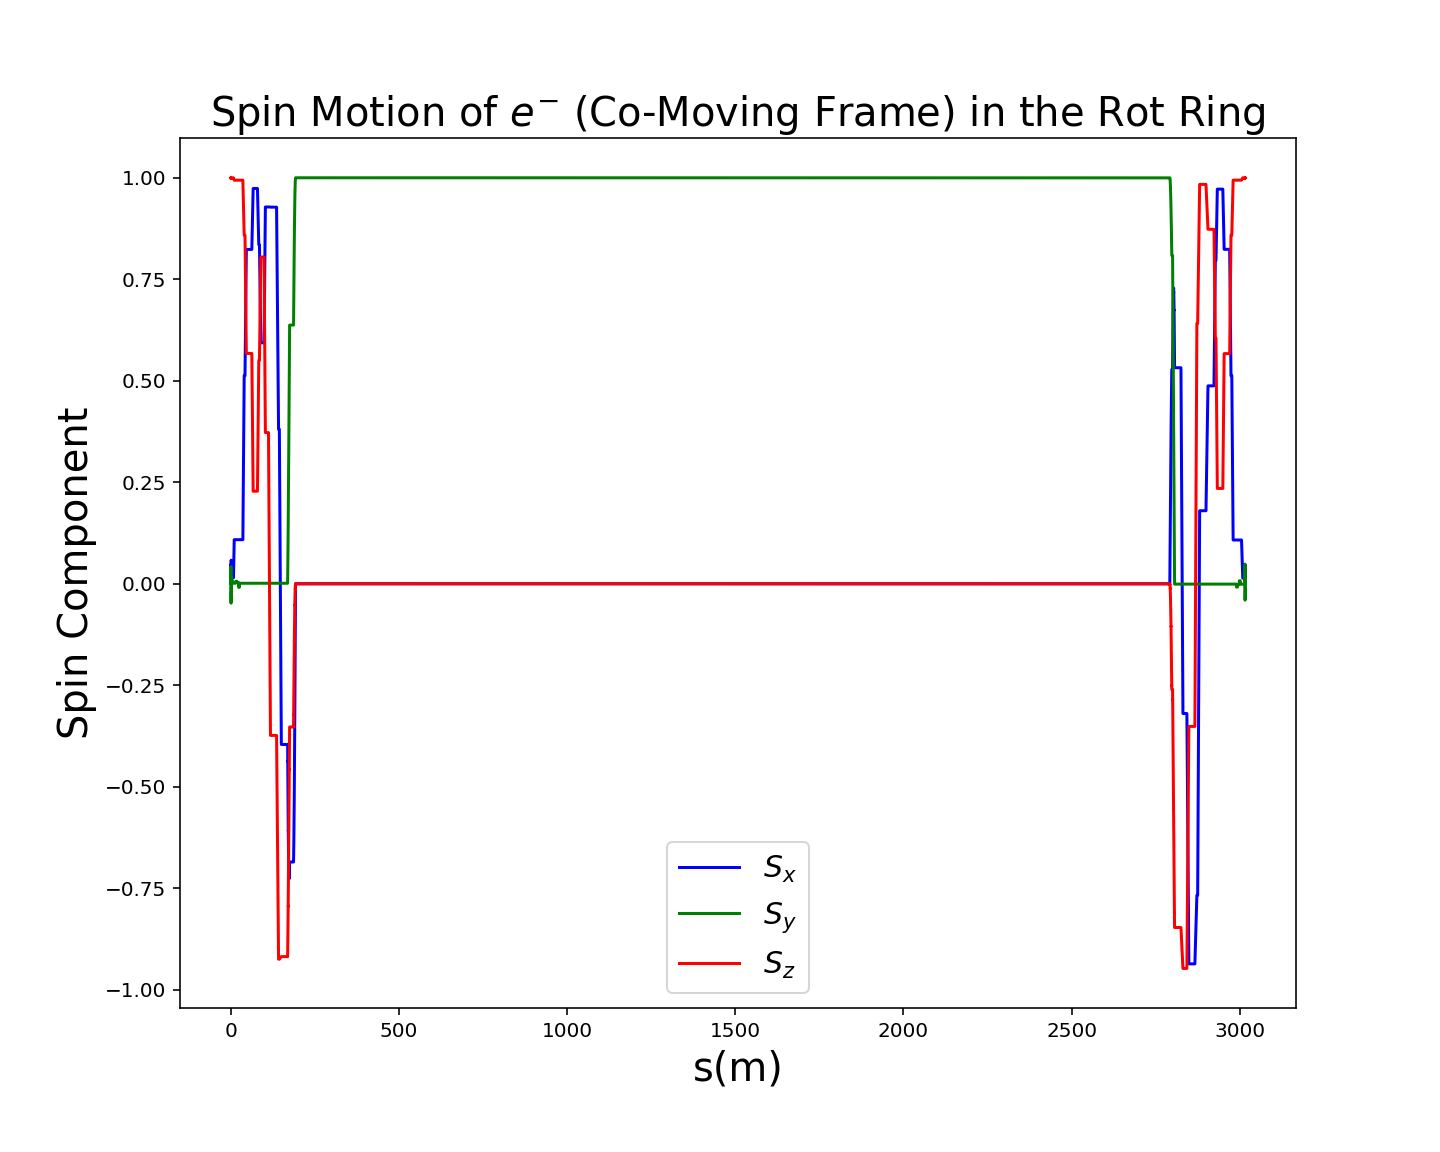

In [18]:
sp('Rot-spin-floor(-).txt', ':')

<IPython.core.display.Javascript object>


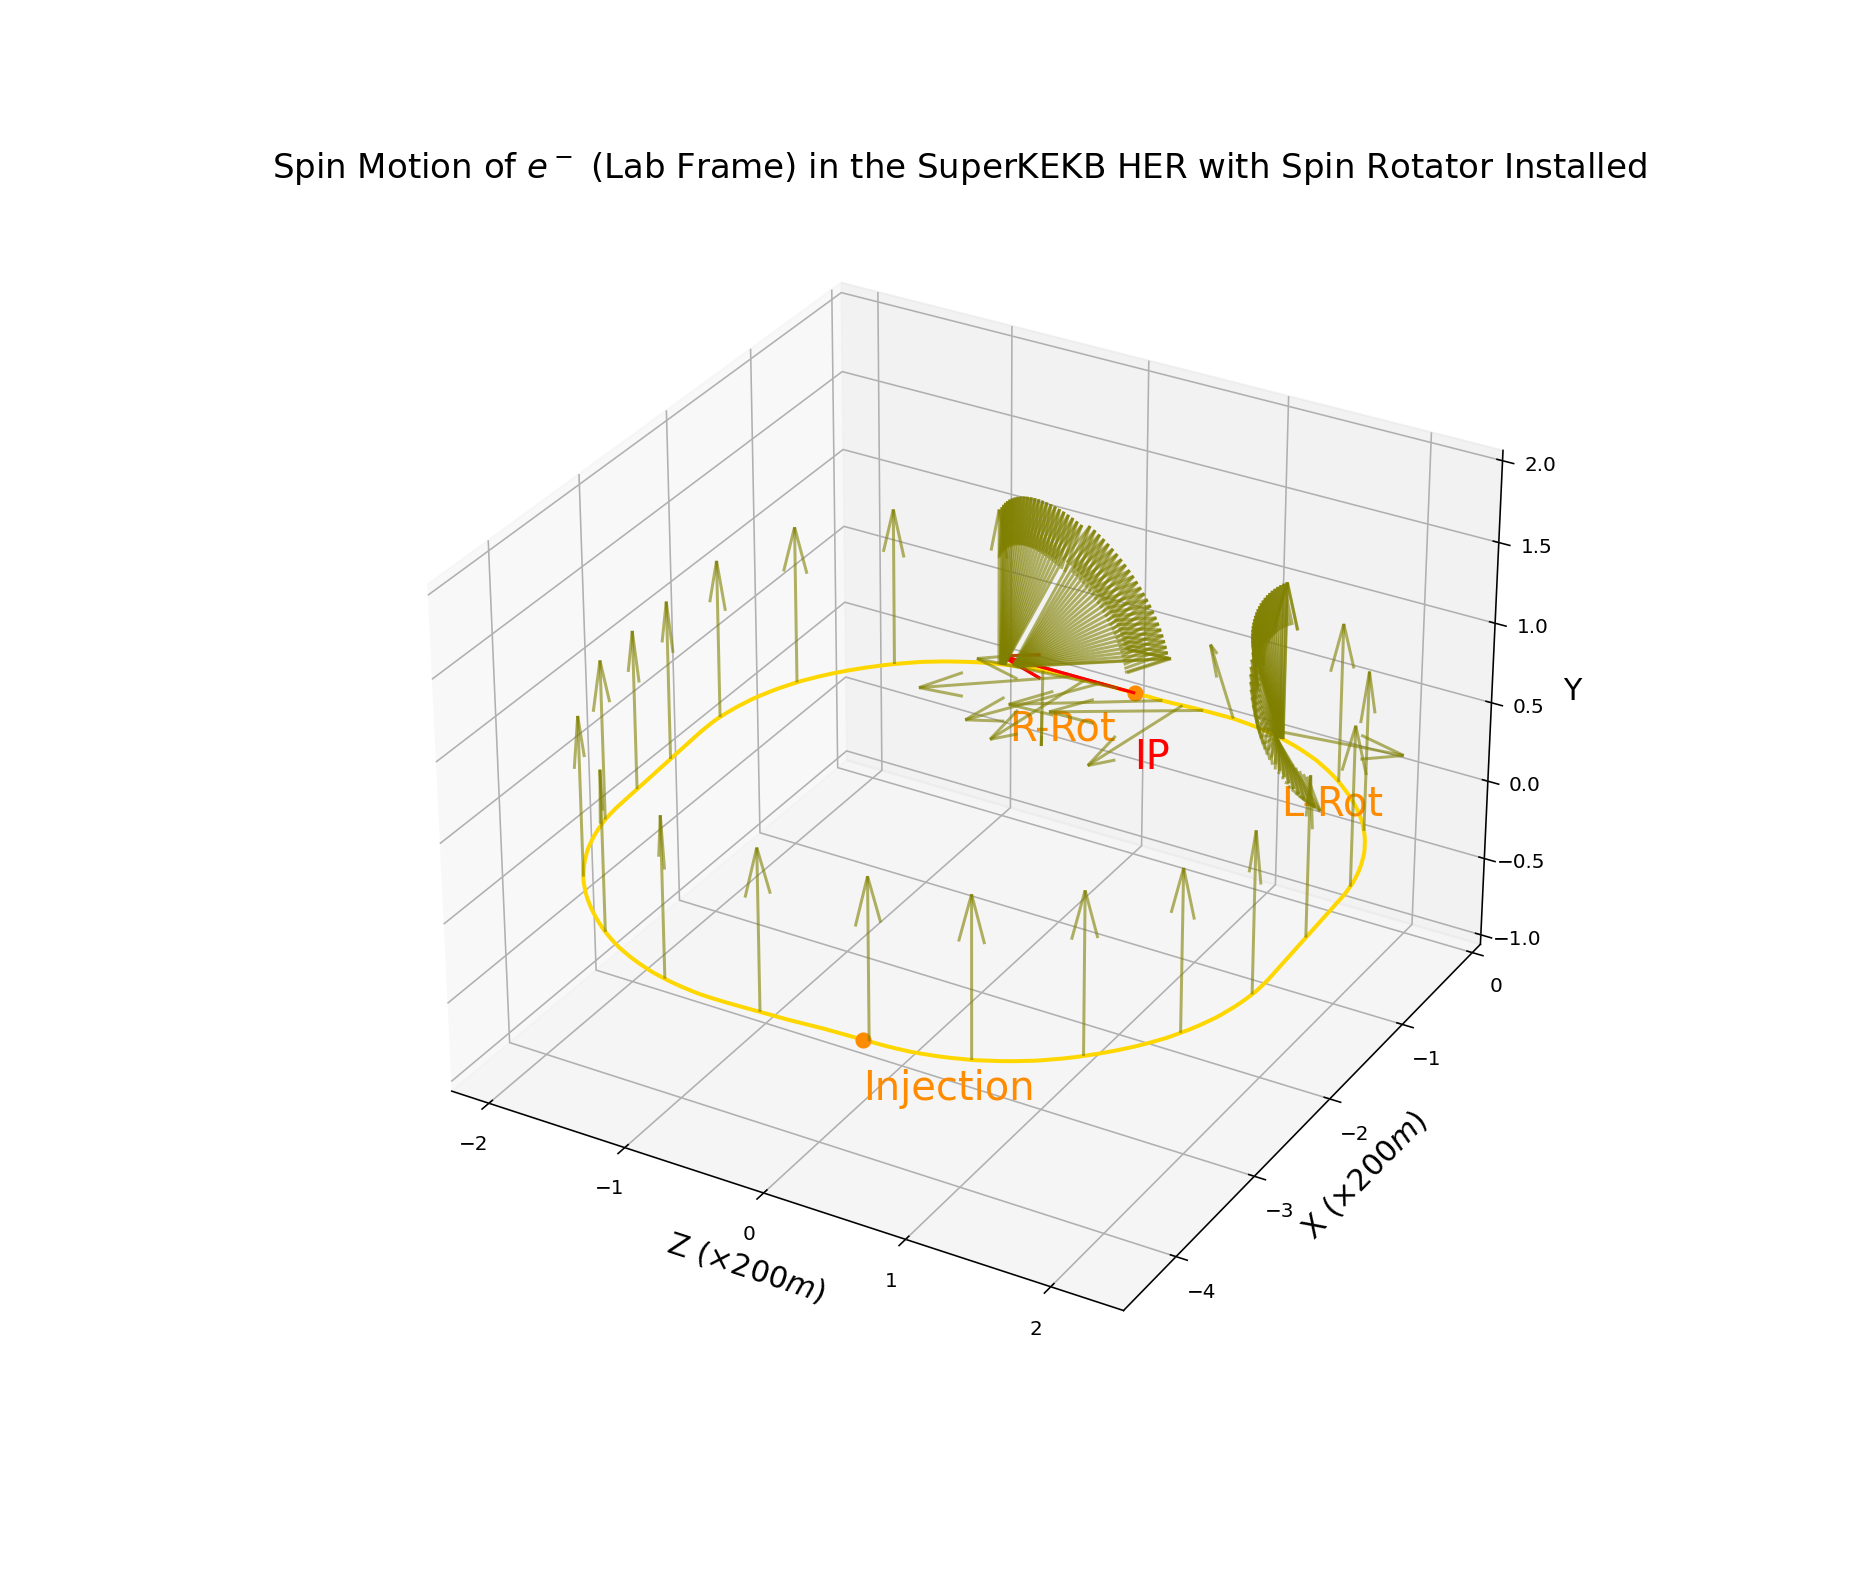

In [19]:
tp('Rot-spin-floor(-).txt', ':', 200, 20, 24, 5) 